<a href="https://colab.research.google.com/github/stmulugheta/AI-Projects-2021/blob/main/Final_Farida_EasyOCR_Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#!ls "/content/drive/My Drive"

In [ ]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 0s (340 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!pip install pdf2image
!pip install easyocr
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 15 kB/s 
     |████████████████████████████████| 47.6 MB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pdf2image import convert_from_path
import easyocr
import pandas as pd
import numpy as np
import PIL
from PIL import ImageDraw
import spacy
from IPython.display import display,Image
from spacy import displacy
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS


### Document used : 5f4212d7-7bb7-45e5-9d74-3c1e26770e55.pdf
### Sector : Commercial Property Company

### Load the Whole document

In [ ]:
sample_pdf = "/content/drive/MyDrive/SustainLab/Modified_5f4212d7-7bb7-45e5-9d74-3c1e26770e55.pdf"

### Load/read the document using easyocr

In [ ]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

### Convert the pdf into images

In [ ]:
images = convert_from_path(sample_pdf)

### Displaying one sample image(page 8 of the document)


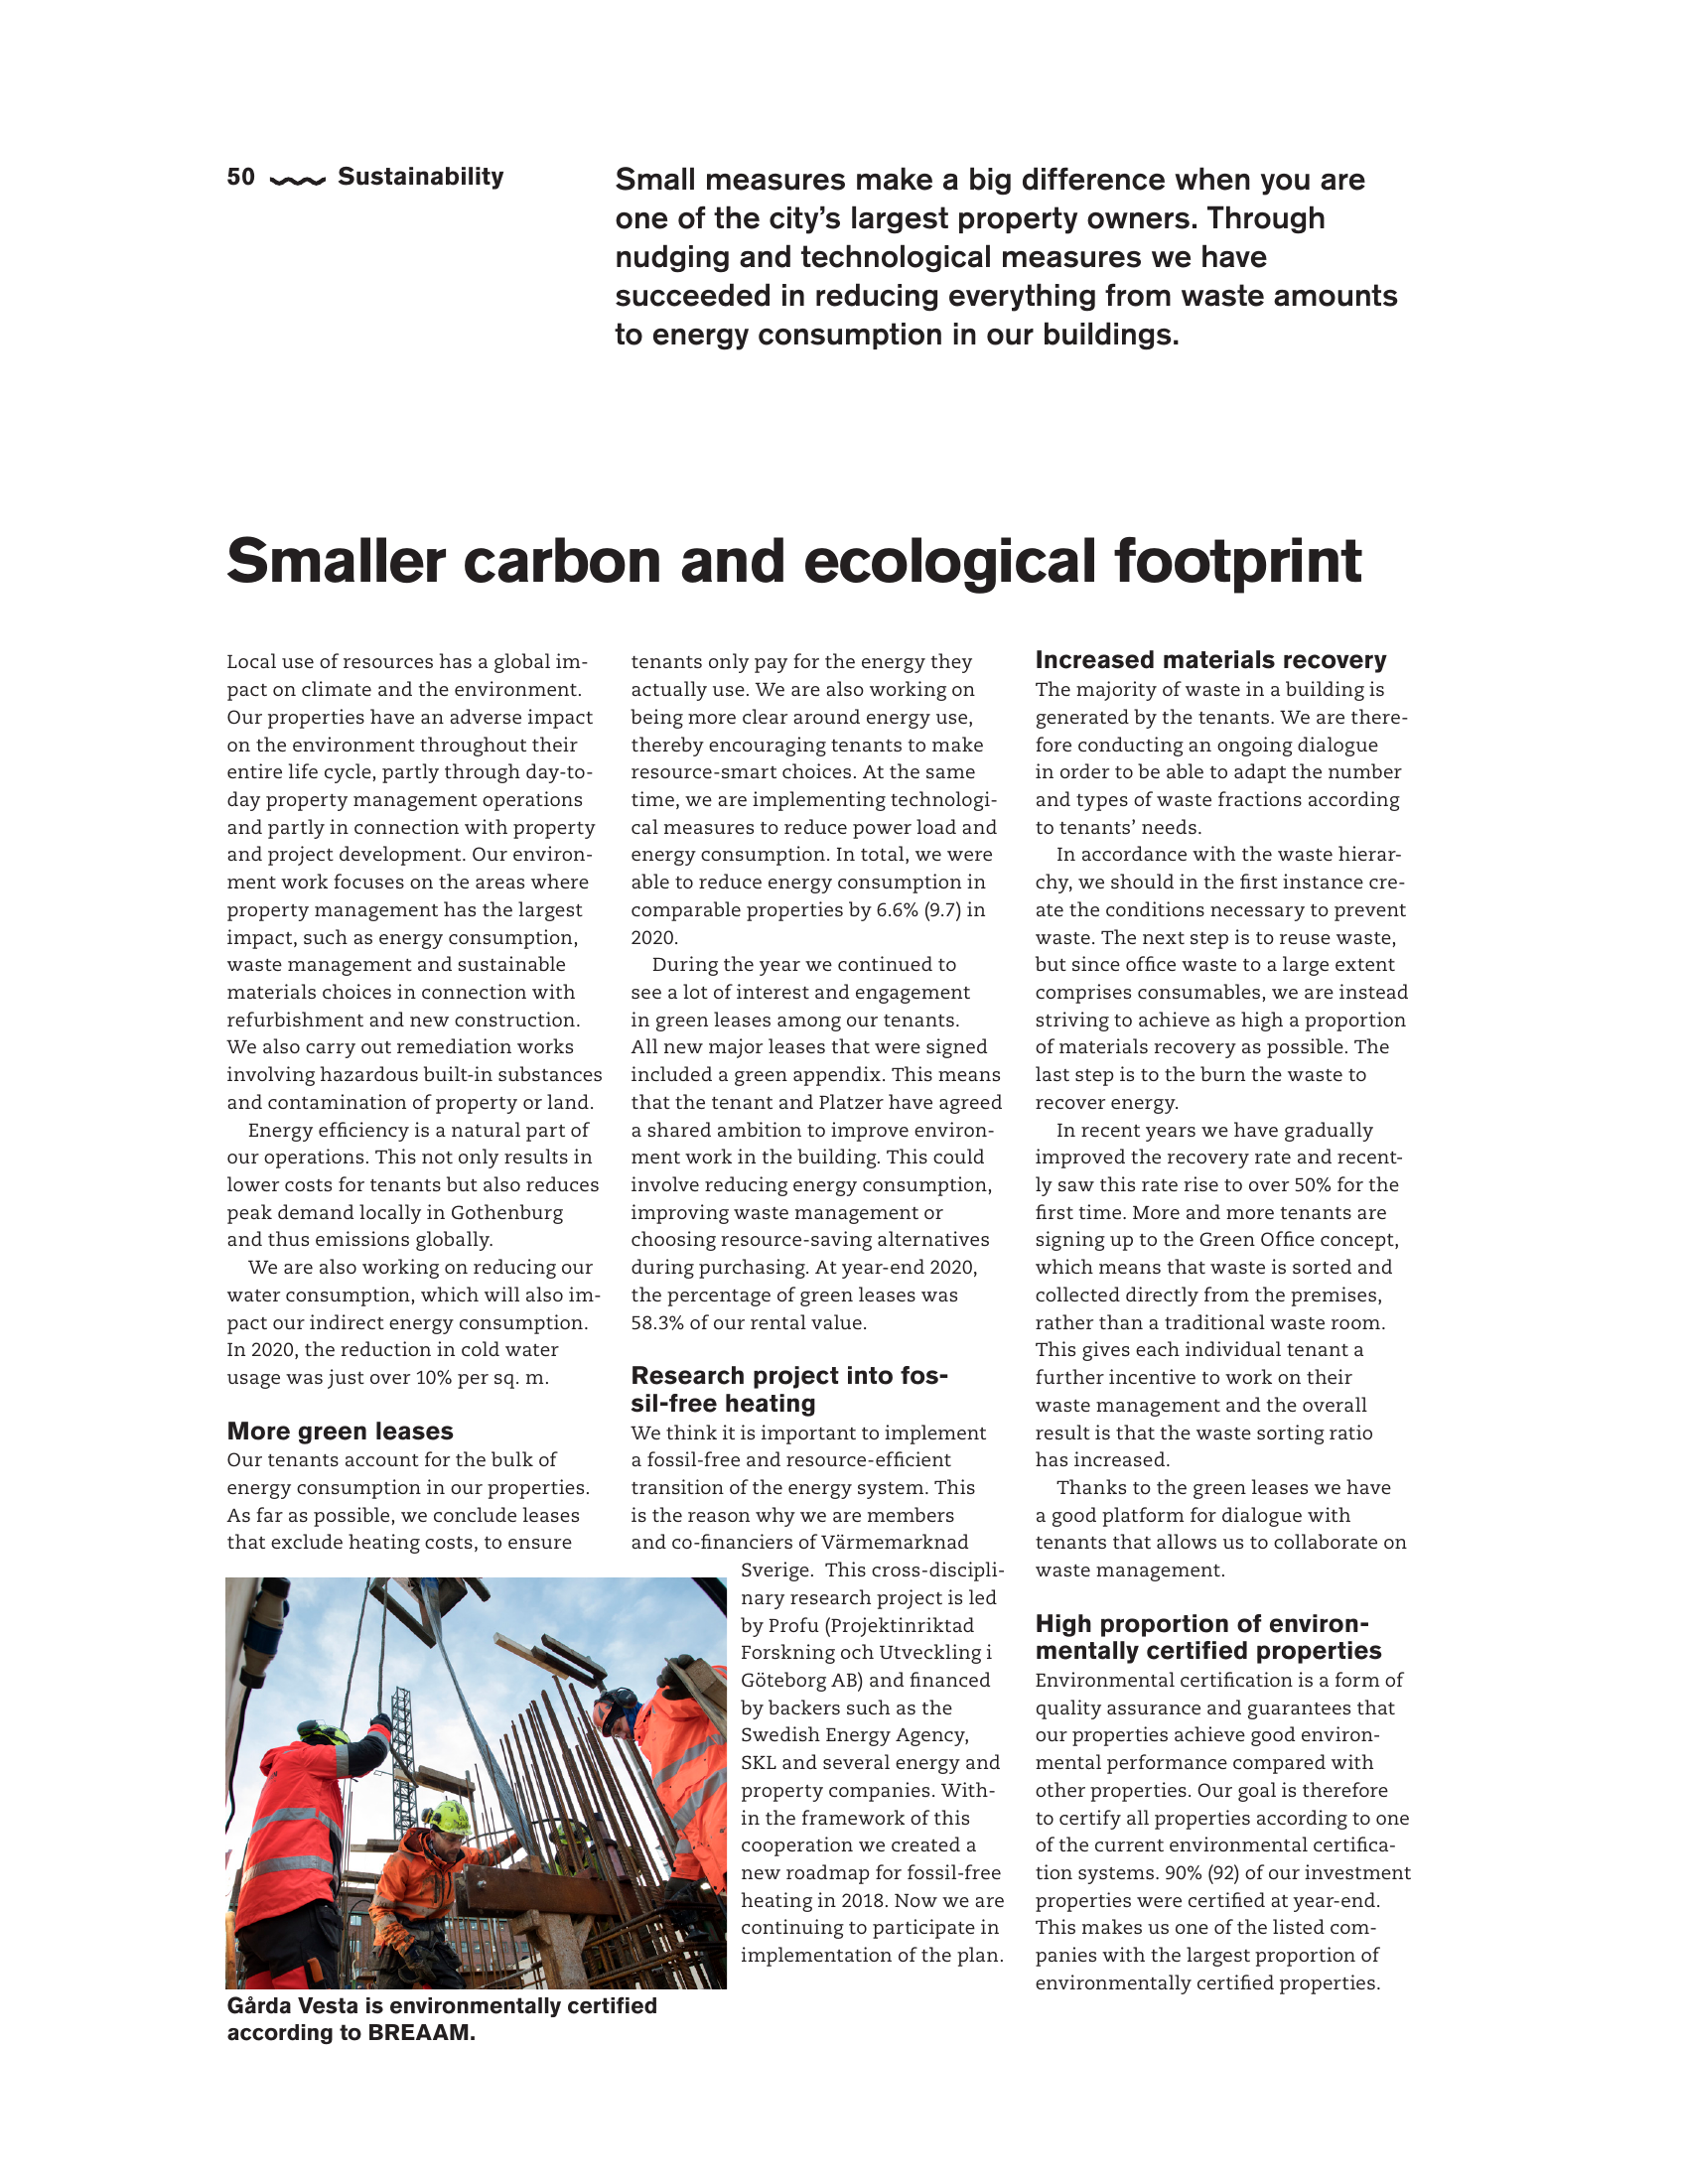

In [ ]:
display(images[8])

### Extract the sentences:

#### Steps:
1. Create bounding boxes
2. Extract the sentence
3. Use metrics to identify accuracy (Confidence Interval metrics)

In [ ]:
bounds = reader.readtext(np.array(images[8]),decoder='beamsearch')

In [ ]:
bounds

[([[226, 164], [262, 164], [262, 192], [226, 192]], '50', 0.999813294566478),
 ([[336, 159], [513, 159], [513, 197], [336, 197]],
  'Sustainability',
  0.9999825724352991),
 ([[617, 163], [1381, 163], [1381, 203], [617, 203]],
  'Small measures make a big difference when you are',
  0.8131178650460615),
 ([[617, 202], [1341, 202], [1341, 243], [617, 243]],
  "one of the city's largest property owners: Through",
  0.8932473567235141),
 ([[617, 241], [1281, 241], [1281, 281], [617, 281]],
  'nudging and technological measures we have',
  0.9103987720637493),
 ([[616, 276], [1412, 276], [1412, 321], [616, 321]],
  'succeeded in reducing everything from waste amounts',
  0.7314066761927571),
 ([[615, 316], [1194, 316], [1194, 360], [615, 360]],
  'to energy consumption in our buildings',
  0.5695589939667041),
 ([[223, 527], [1384, 527], [1384, 613], [223, 613]],
  'Smaller carbon and ecological footprint',
  0.9399533571554208),
 ([[224, 654], [596, 654], [596, 682], [224, 682]],
  'Local

### Function to draw Bounding boxes

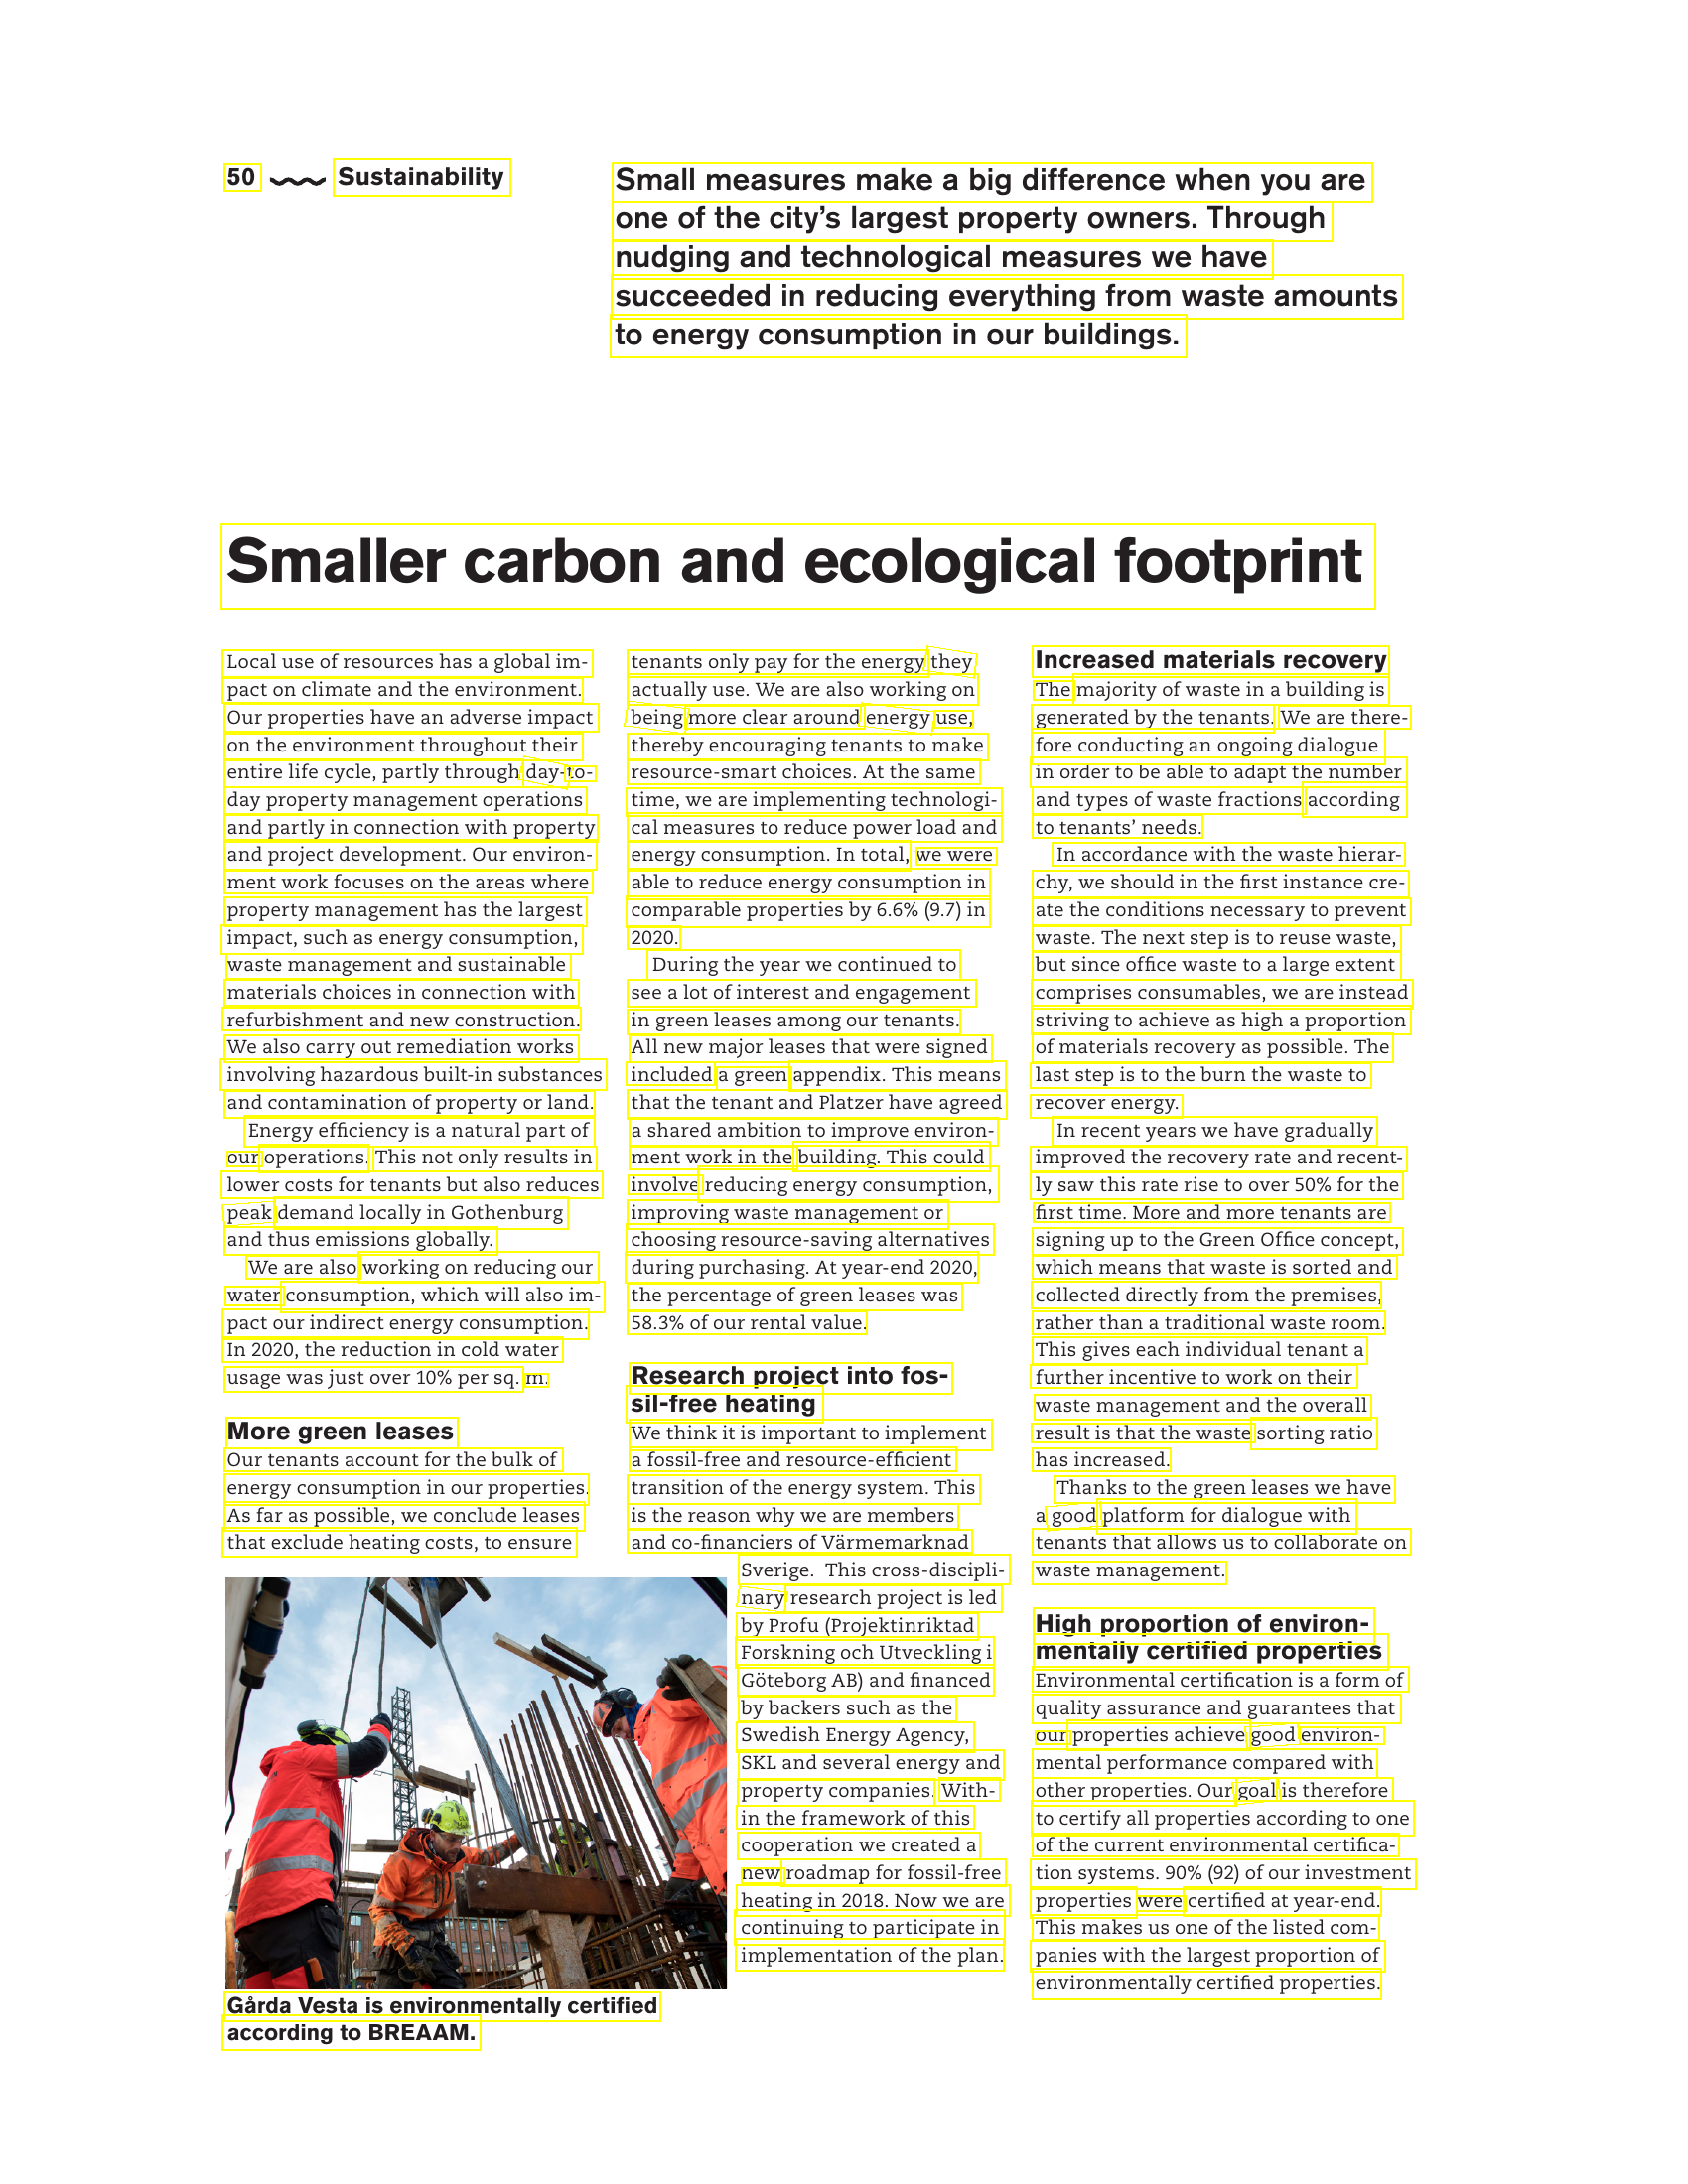

In [ ]:
def draw_boxes(image,bounds,color='yellow',width=2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0,p1,p2,p3 = bound[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
  return image

draw_boxes(images[8],bounds)

In [ ]:
print("Bounding box location",bounds[2][0]) # [row][0]-> bounding boxes location,
print("Text extraction:", bounds[2][1])#[row][1] -> text extraction , 
print("Confidence Interval:", bounds[2][2]) #[row][2] ->confidence interval,

Bounding box location [[617, 163], [1381, 163], [1381, 203], [617, 203]]
Text extraction: Small measures make a big difference when you are
Confidence Interval: 0.8131178650460615


### Assigning Extracted text in a variable

In [ ]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'
  
print (text)


50
Sustainability
Small measures make a big difference when you are
one of the city's largest property owners: Through
nudging and technological measures we have
succeeded in reducing everything from waste amounts
to energy consumption in our buildings
Smaller carbon and ecological footprint
Local use of resources has a global im-
tenants only pay for the energy
Increased materials recovery
pact on climate and the environment:
actually use: We are also working on
The
majority of waste in a building is
Our properties have an adverse impact
more clear around
use,
generated by the tenants_
We are there -
on the environment throughout their
thereby encouraging tenants to make
fore conducting an ongoing dialogue
entire life cycle, partly through
to-
resource-smart choices. At the same
in order to be able to adapt the number
day property management operations
time, we are implementing technologi-
and types of waste fractions
according
and partly in connection with property
cal measures to re

### Create a Dataframe to organize all the information from the extraction

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [ ]:
df1 = pd.DataFrame(columns=["Sent_extract", "Confidence_Interval"])
df1

,Sent_extract,Confidence_Interval


In [ ]:
for i in range(len(bounds)):
  df1 = df1.append({"Sent_extract": bounds[i][1],"Confidence_Interval":bounds[i][2]}, ignore_index=True)

df1

,Sent_extract,Confidence_Interval
0,50,0.999813
1,Sustainability,0.999983
2,Small measures make a big difference when you are,0.813118
3,one of the city's largest property owners: Through,0.893247
4,nudging and technological measures we have,0.910399
5,succeeded in reducing everything from waste amounts,0.731407
6,to energy consumption in our buildings,0.569559
7,Smaller carbon and ecological footprint,0.939953
8,Local use of resources has a global im-,0.728906
9,tenants only pay for the energy,0.787510


In [ ]:
#df1["Sent_extract"]

### Keyword Extraction using visualizations

- Word Cloud

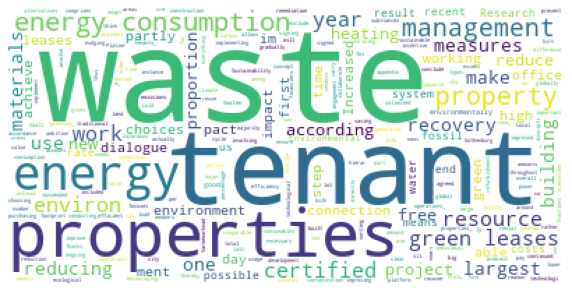

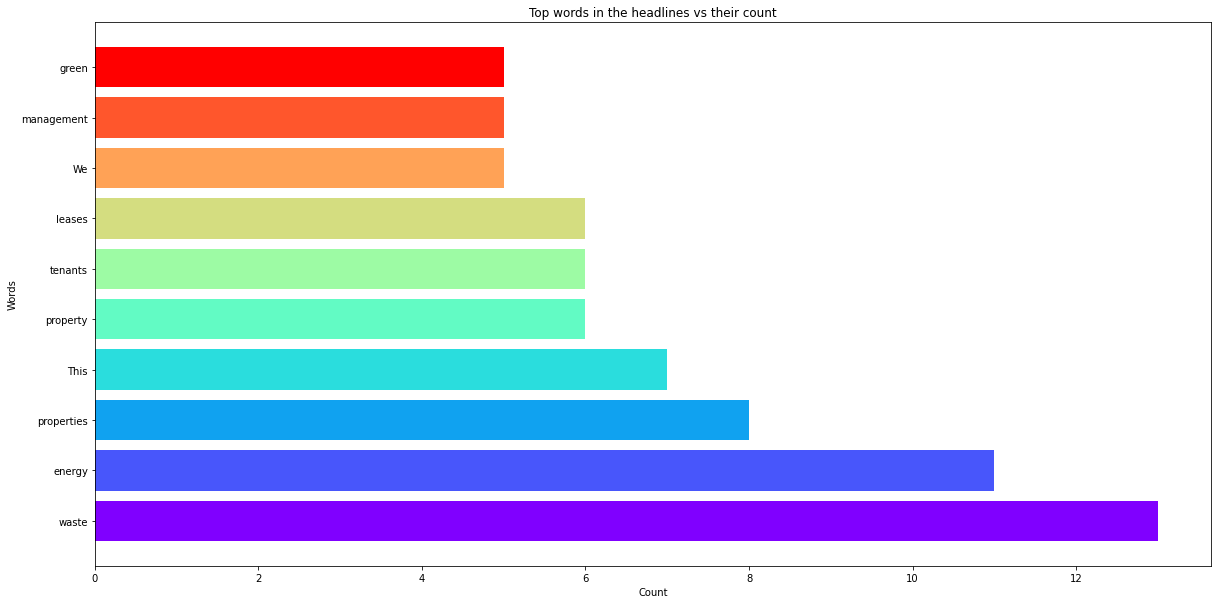

In [ ]:
all_headlines = text
stopwords = STOPWORDS
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_headlines)
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
filtered_words = [word for word in all_headlines.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)
words = []
counts = []
for letter, count in counted_words.most_common(10):
  words.append(letter)
  counts.append(count)
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10
plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)
plt.show()

#### Inference from Word Cloud

- By observing the word cloud(1st graph) keyword extracted are properties, tenants which give information that the company is a Property Management company.

- This company has emphasized more on energy consumption which is one of most frequently used word.

- They have got "green leases" which is a significant keyword.

- Most frequently used word is "Waste" 

- These results are for 1 page extraction.



### Future Work

- Run this whole document in a loop or function to extract all possible keywords for this commercial property management

### Cons of using easyocr

- Super small font size extraction is giving poor results. Metrics fell <50%

- Not tested on tables yet

- Not tested on charts yet

- EasyOcr works best for text documents